## Python Data Science - aggregations


In [1]:
import pandas as pd

### Read in the dataset

Load the dataset from ```phone_data.csv```, and use the first column as index. Process the ```date``` column as `datetime` datatype.

Show the first 5 rows.

In [2]:
#Import the dataset as it is
data=pd.read_csv('phone_data.csv')
data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [3]:
#Now import the dataset setting first coulmn as index
data = pd.read_csv('phone_data.csv',index_col=0)

data.head()

,date,duration,item,month,network,network_type
index,,,,,,
0,15/10/14 06:58,34.429,data,2014-11,data,data
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [4]:
# Now, convert date column to datetime datatype
data['date'] = pd.to_datetime(data['date'])
# show first five rows
data.head()

,date,duration,item,month,network,network_type
index,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


Note: First two cell are used to show you the process step by step. If you don't need them you can delete the cells.

Do an info() call to see the column data types.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          830 non-null    datetime64[ns]
 1   duration      830 non-null    float64       
 2   item          830 non-null    object        
 3   month         830 non-null    object        
 4   network       830 non-null    object        
 5   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 45.4+ KB


### Getting general statistics

How many entries for each month? You can use the ```month``` column so you don't have to extract the months by yourself.

In [6]:
data['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

Create a GroupBy object (by month) and do some exploring - can you get the sum of the durations by month?

Try one solution that produces a dataframe


In [7]:
#Perform a group by and calculate the sum of durations 
#The following solutions gives output in a dataframe
data.groupby(data['month']).aggregate('sum')

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


Find another solution to the same question, this time, produce a Series.

In [8]:
# Group by a column and get the sum of another column as a Series
data.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

Dr. Song did ```gm['date'].count()``` below. How do you explain the result presented below?

hint - the ```date``` column's dtype is datetime.

In [9]:
#Dr. Song did this
data.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

<font color='white'> Answer: 'date' is datetime datatype, but in the above code, first a group by operation is done using 'month' column then count of 'date' column is calculated for each unique month. This 'count' is represented in integers thats why data type is int64. So, in the expression ```Name: date, dtype: int64``` dtype: int64, is actually represnting the data type of the count value.

What are the different items possible in data? Select the ```item``` column from the dataset, then do a ```value_counts()```

In [10]:
data['item'].value_counts()

call    388
sms     292
data    150
Name: item, dtype: int64

### More groupbys

Make a mask so that you get all the **calls** only, then find the sum of durations by network.

In [11]:
#first extract the data where item = call
call_data = data[data['item']=='call']

#Now, perform a groupby and calcualte the sum
data.groupby(call_data['network']).aggregate('sum')

,duration
network,
Meteor,7200.0
Tesco,13828.0
Three,36464.0
Vodafone,14621.0
landline,18433.0
voicemail,1775.0


Answer this question - do you need to select the 'duration' column, why, or why not?

In [12]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 1 to 816
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          388 non-null    datetime64[ns]
 1   duration      388 non-null    float64       
 2   item          388 non-null    object        
 3   month         388 non-null    object        
 4   network       388 non-null    object        
 5   network_type  388 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 29.3+ KB


<font color='red'> answer here- When groupby is done and 'sum' is calculated then by default only the sum of 'duration' column is presenrted beacuse, in the dataframe only 'duration' has a numerical (float64) data type. Other columns have non-numeric datatypes.

Grouping by multiple columns - let's find the number of records by month and type of service used (```item``` column).

The results from .count() can be confusing, try size() instead.

In [13]:
# group first by month, then by item
data.groupby(['month', 'item']).size()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
dtype: int64


### Using agg()

By default, what you group by will be the index of the output after you call an aggregate function. You can change the default behavior by adding the optional argument ```as_index=False``` to the groupby() method.

Create another groupby object to group the data by month, but this time, set ```as_index=False```

Then, find the sum of duration by month again.

In [14]:
data.groupby('month', as_index=False).sum()


,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


### aggregation on multiple columns
use the same groupby month object, get the column ```item```, and min, max and mean on column ``` duration```.

In [15]:
data.groupby('month', as_index=False).agg({'item': 'count', 'duration': ['min', 'max', 'mean']})

month  item duration                     
           count      min      max        mean
0  2014-11   230      1.0   1940.0  115.823657
1  2014-12   157      1.0   2120.0   93.260318
2  2015-01   205      1.0   1859.0   88.894141
3  2015-02   137      1.0   1863.0  113.301453
4  2015-03   101      1.0  10528.0  225.251891

Use the aggregated object above, find the multi-indexes (or columns) available.

In [16]:
# To get the MultiIndex, store the groupby output as a new dataframe
grouped_data = data.groupby('month').agg({'item': 'count', 'duration': ['min', 'max', 'mean']})

# now get the column names as MultiIndex
grouped_data.columns

MultiIndex([(    'item', 'count'),
            ('duration',   'min'),
            ('duration',   'max'),
            ('duration',  'mean')],
           )

Use the right tuple as an index and get the values for the maximum of durations.

In [17]:
#Extract the values for ('duration',   'max') from multiindex 
#and reset the index to get the desired output

grouped_data.loc[:,('duration','max')].reset_index(drop=True)

0     1940.0
1     2120.0
2     1859.0
3     1863.0
4    10528.0
Name: (duration, max), dtype: float64

All done!
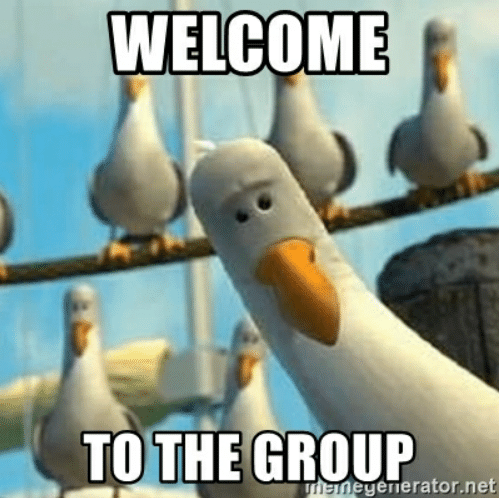